In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('datasets/bdata.csv', low_memory=False, index_col='station_id' )
df

,longitude,latitude,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,MeanWaveDirection,Hmax,AirTemperature,DewPoint,SeaTemperature,RelativeHumidity,QC_Flag
station_id,,,,,,,,,,,,,,,,
NaN,degrees_east,degrees_north,UTC,mb,degrees_true,kn,kn,m,s,degrees_true,m,degree_C,degree_C,degree_C,percent,NaN
M1,-11.2,53.1266,2001-02-06T13:00:00Z,967.6,270.0,21.98,33.1,NaN,NaN,NaN,NaN,8.9,NaN,9.0,NaN,1.0
M1,-11.2,53.1266,2001-02-06T14:00:00Z,969.8,270.0,23.93,35.0,NaN,NaN,NaN,NaN,8.5,NaN,9.0,NaN,1.0
M1,-11.2,53.1266,2001-02-06T15:00:00Z,972.0,270.0,19.07,31.1,NaN,NaN,NaN,NaN,8.9,NaN,9.0,NaN,1.0
M1,-11.2,53.1266,2001-02-06T16:00:00Z,973.6,270.0,15.95,25.3,NaN,NaN,NaN,NaN,9.1,NaN,9.0,NaN,1.0
M1,-11.2,53.1266,2001-02-06T18:00:00Z,976.4,270.0,12.06,19.5,NaN,NaN,NaN,NaN,8.8,NaN,9.0,NaN,1.0
M1,-11.2,53.1266,2001-02-06T20:00:00Z,978.8,260.0,11.09,17.5,NaN,NaN,NaN,NaN,8.8,NaN,9.0,NaN,1.0
M1,-11.2,53.1266,2001-02-06T21:00:00Z,979.8,280.0,9.92,17.5,NaN,NaN,NaN,NaN,8.2,NaN,9.0,NaN,1.0
M1,-11.2,53.1266,2001-02-06T22:00:00Z,980.6,300.0,7.98,13.6,NaN,NaN,NaN,NaN,8.2,NaN,9.0,NaN,1.0


In [5]:
M3df= df.loc['M3',[ 'time','AtmosphericPressure' ,'WindDirection', 'WindSpeed', 'WaveHeight']]

In [6]:

M3df.to_csv('datasets/m3data.csv')

In [7]:
f = pd.read_csv('datasets/M3data.csv',low_memory= False)
(11,high=15, size=25)

f.loc[22800:22899,:] 
M3_100= f.loc[22800:22899,:]
M3_100.to_csv('datasets/m3_100data.csv')
M3_100

,station_id,time,AtmosphericPressure,WindDirection,WindSpeed,WaveHeight
22800,M3,2005-05-05T14:00:00Z,1029.8,290.0,17.0,1.8
22801,M3,2005-05-05T15:00:00Z,1029.6,NaN,17.0,1.8
22802,M3,2005-05-05T16:00:00Z,1028.8,NaN,17.0,1.9
22803,M3,2005-05-05T17:00:00Z,1029.0,300.0,18.0,2.0
22804,M3,2005-05-05T18:00:00Z,1028.8,300.0,16.0,2.1
22805,M3,2005-05-05T19:00:00Z,1028.6,300.0,18.0,2.1
22806,M3,2005-05-05T20:00:00Z,1028.6,300.0,17.0,2.2
22807,M3,2005-05-05T21:00:00Z,1028.6,290.0,17.0,2.3
22808,M3,2005-05-05T22:00:00Z,1028.4,290.0,16.0,2.4
22809,M3,2005-05-05T23:00:00Z,1028.0,290.0,17.0,2.5


In [15]:
df= pd.read_csv('datasets/M3_100data.csv', index_col='time')
df

,Unnamed: 0,station_id,AtmosphericPressure,WindDirection,WindSpeed,WaveHeight
time,,,,,,
2005-05-05T14:00:00Z,22800,M3,1029.8,290.0,17.0,1.8
2005-05-05T15:00:00Z,22801,M3,1029.6,NaN,17.0,1.8
2005-05-05T16:00:00Z,22802,M3,1028.8,NaN,17.0,1.9
2005-05-05T17:00:00Z,22803,M3,1029.0,300.0,18.0,2.0
2005-05-05T18:00:00Z,22804,M3,1028.8,300.0,16.0,2.1
2005-05-05T19:00:00Z,22805,M3,1028.6,300.0,18.0,2.1
2005-05-05T20:00:00Z,22806,M3,1028.6,300.0,17.0,2.2
2005-05-05T21:00:00Z,22807,M3,1028.6,290.0,17.0,2.3
2005-05-05T22:00:00Z,22808,M3,1028.4,290.0,16.0,2.4


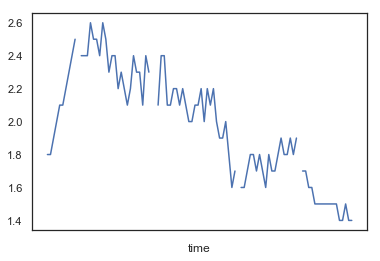

In [22]:
data['WaveHeight'].plot()
plt.show()

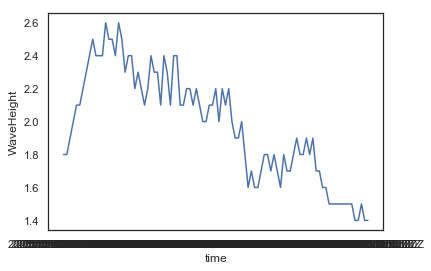

In [21]:
import seaborn as sns
sns.set(style="white")



sns.lineplot(x="time", y="WaveHeight",data=M3_100)


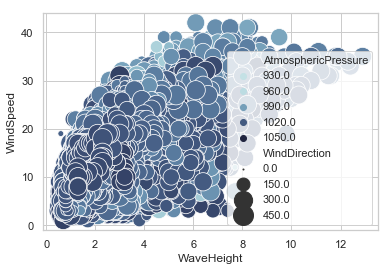

In [56]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="WaveHeight", y="WindSpeed", size="WindDirection",hue="AtmosphericPressure",
                     palette=cmap, sizes=(1, 400),
                     data=df)